In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mtrain.synth.v3 import generate, generate_single

In [3]:
PROJECT_CODE = "s0005-frags-v3-on-clean-cases"

In [4]:
import os
import json
import shutil
import random
from pathlib import Path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from tqdm import tqdm
from urllib.parse import urlparse
import numpy as np


DRIVE_BASE = Path('/content/drive/Othercomputers/My MacBook Pro/gdrive-sync')

In [7]:
from mtrain.yolo.split import prepare_yolo_dataset
from mtrain.synth.v3 import generate
from mtrain.data_prep.prep_crops import PrepareCrops


# DATASETS = Path("/content/roads/datasets")
DATASETS = Path("../../datasets")
CROPS = DATASETS / "T003-extract-and-place-on-backdrops-manually" / "crops"
IMAGES = DATASETS / "clean_samples"
SEGS = DATASETS / "clean_samples_segs"
IMAGES.exists(), CROPS.exists()

(True, True)

In [6]:
images = list(IMAGES.glob("*.jpg"))

In [19]:
images[0]

PosixPath('../../datasets/clean_samples/1329333708315271.jpg')

In [22]:

frags = [
    crp for crp in PrepareCrops(CROPS).get_all_existing_crops() if crp.proc
]

params StdLumMatcherParams(src_mean=np.float32(67.42578), src_std=np.float32(65.24636), tgt_mean=np.float32(155.14526), tgt_std=np.float32(1.7655078))
params StdLumMatcherParams(src_mean=np.float32(110.44666), src_std=np.float32(62.890568), tgt_mean=np.float32(79.56055), tgt_std=np.float32(41.93816))
params StdLumMatcherParams(src_mean=np.float32(143.00209), src_std=np.float32(55.616), tgt_mean=np.float32(153.5003), tgt_std=np.float32(10.905655))
params StdLumMatcherParams(src_mean=np.float32(113.96774), src_std=np.float32(75.676895), tgt_mean=np.float32(202.98514), tgt_std=np.float32(4.7171783))


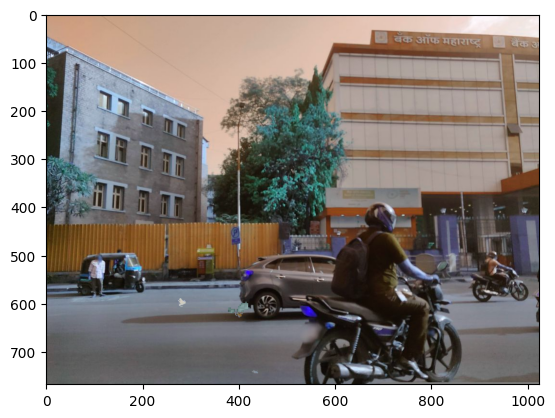

In [28]:
rr, _ = generate_single(images[0], frags, segs_root / "1329333708315271.json")
plt.imshow(rr)

In [11]:
segs_root = (images[0].parent.parent / "clean_samples_segs")
segs_root.mkdir(exist_ok=True, parents=True)

In [15]:
! ls ./../../datasets/clean_samples_segs

In [29]:
from mtrain.seg.cityscapes import get_cached_seg_former
from tqdm import tqdm

model = get_cached_seg_former()
for i in tqdm(images):
    pred = model.predict(i)
    content = pred.tolist()
    dest = segs_root / f"{i.stem}.json"
    with open(dest, "w") as f:
        json.dump(content, f)
    

100%|██████████| 127/127 [01:26<00:00,  1.47it/s]


In [8]:
from mtrain.synth.v3 import get_image_and_seg_for

image_and_segs = get_image_and_seg_for(IMAGES, SEGS)

In [10]:
generate(image_and_segs, CROPS, DATASETS / "T003-synth-final", 100)

  2%|▏         | 2/100 [00:00<00:20,  4.74it/s]

params StdLumMatcherParams(src_mean=np.float32(100.25313), src_std=np.float32(61.55786), tgt_mean=np.float32(83.06349), tgt_std=np.float32(1.993652))
params StdLumMatcherParams(src_mean=np.float32(147.9947), src_std=np.float32(77.085365), tgt_mean=np.float32(127.113754), tgt_std=np.float32(2.8983512))
params StdLumMatcherParams(src_mean=np.float32(97.37535), src_std=np.float32(62.785477), tgt_mean=np.float32(101.854515), tgt_std=np.float32(1.7165223))
params StdLumMatcherParams(src_mean=np.float32(134.48695), src_std=np.float32(62.942814), tgt_mean=np.float32(203.54889), tgt_std=np.float32(9.797681))
params StdLumMatcherParams(src_mean=np.float32(143.00209), src_std=np.float32(55.616), tgt_mean=np.float32(30.712746), tgt_std=np.float32(20.511927))
params StdLumMatcherParams(src_mean=np.float32(81.653336), src_std=np.float32(45.98369), tgt_mean=np.float32(28.011345), tgt_std=np.float32(21.464672))


  4%|▍         | 4/100 [00:00<00:19,  4.82it/s]

params StdLumMatcherParams(src_mean=np.float32(92.497475), src_std=np.float32(51.281387), tgt_mean=np.float32(109.52979), tgt_std=np.float32(13.988984))
params StdLumMatcherParams(src_mean=np.float32(75.48864), src_std=np.float32(39.57674), tgt_mean=np.float32(82.92815), tgt_std=np.float32(59.314804))
params StdLumMatcherParams(src_mean=np.float32(155.70486), src_std=np.float32(79.64722), tgt_mean=np.float32(151.64386), tgt_std=np.float32(3.4409266))


  6%|▌         | 6/100 [00:01<00:15,  6.08it/s]

params StdLumMatcherParams(src_mean=np.float32(143.3158), src_std=np.float32(77.070305), tgt_mean=np.float32(23.477137), tgt_std=np.float32(4.883642))
params StdLumMatcherParams(src_mean=np.float32(170.47435), src_std=np.float32(83.582184), tgt_mean=np.float32(140.82841), tgt_std=np.float32(34.713833))
params StdLumMatcherParams(src_mean=np.float32(180.61938), src_std=np.float32(83.27731), tgt_mean=np.float32(100.39708), tgt_std=np.float32(5.0225005))


  8%|▊         | 8/100 [00:01<00:15,  6.00it/s]

params StdLumMatcherParams(src_mean=np.float32(96.43396), src_std=np.float32(67.85673), tgt_mean=np.float32(118.69814), tgt_std=np.float32(13.499901))
params StdLumMatcherParams(src_mean=np.float32(94.72), src_std=np.float32(67.651695), tgt_mean=np.float32(150.37349), tgt_std=np.float32(25.74406))
params StdLumMatcherParams(src_mean=np.float32(113.96774), src_std=np.float32(75.676895), tgt_mean=np.float32(153.5269), tgt_std=np.float32(10.261256))
params StdLumMatcherParams(src_mean=np.float32(111.5375), src_std=np.float32(66.35026), tgt_mean=np.float32(1.9075155), tgt_std=np.float32(0.3936122))


 11%|█         | 11/100 [00:01<00:12,  6.97it/s]

params StdLumMatcherParams(src_mean=np.float32(67.42578), src_std=np.float32(65.24636), tgt_mean=np.float32(82.0555), tgt_std=np.float32(7.0747786))
params StdLumMatcherParams(src_mean=np.float32(117.84314), src_std=np.float32(56.882244), tgt_mean=np.float32(81.73232), tgt_std=np.float32(4.8409758))
params StdLumMatcherParams(src_mean=np.float32(145.55331), src_std=np.float32(66.814415), tgt_mean=np.float32(160.5638), tgt_std=np.float32(1.9650624))
params StdLumMatcherParams(src_mean=np.float32(111.5375), src_std=np.float32(66.35026), tgt_mean=np.float32(102.03391), tgt_std=np.float32(16.070156))
params StdLumMatcherParams(src_mean=np.float32(109.26118), src_std=np.float32(63.58557), tgt_mean=np.float32(99.34164), tgt_std=np.float32(3.5611236))


 13%|█▎        | 13/100 [00:02<00:11,  7.32it/s]

params StdLumMatcherParams(src_mean=np.float32(119.95956), src_std=np.float32(74.00641), tgt_mean=np.float32(151.74516), tgt_std=np.float32(21.386192))
params StdLumMatcherParams(src_mean=np.float32(94.823616), src_std=np.float32(82.42396), tgt_mean=np.float32(90.60399), tgt_std=np.float32(10.119165))
params StdLumMatcherParams(src_mean=np.float32(46.930283), src_std=np.float32(33.64669), tgt_mean=np.float32(66.643295), tgt_std=np.float32(29.50863))


 15%|█▌        | 15/100 [00:02<00:11,  7.72it/s]

params StdLumMatcherParams(src_mean=np.float32(113.96774), src_std=np.float32(75.676895), tgt_mean=np.float32(111.96632), tgt_std=np.float32(11.312723))
params StdLumMatcherParams(src_mean=np.float32(79.84118), src_std=np.float32(95.04355), tgt_mean=np.float32(144.00955), tgt_std=np.float32(2.6492503))
params StdLumMatcherParams(src_mean=np.float32(147.8125), src_std=np.float32(61.920437), tgt_mean=np.float32(152.37956), tgt_std=np.float32(4.2834578))
params StdLumMatcherParams(src_mean=np.float32(142.7551), src_std=np.float32(90.011734), tgt_mean=np.float32(155.88208), tgt_std=np.float32(0.19251686))


 18%|█▊        | 18/100 [00:02<00:11,  7.22it/s]

params StdLumMatcherParams(src_mean=np.float32(116.8783), src_std=np.float32(80.56606), tgt_mean=np.float32(169.53), tgt_std=np.float32(9.891781))
params StdLumMatcherParams(src_mean=np.float32(120.110725), src_std=np.float32(63.47564), tgt_mean=np.float32(225.55492), tgt_std=np.float32(7.0739493))
params StdLumMatcherParams(src_mean=np.float32(143.00209), src_std=np.float32(55.616), tgt_mean=np.float32(241.54028), tgt_std=np.float32(4.1291647))
params StdLumMatcherParams(src_mean=np.float32(97.37535), src_std=np.float32(62.785477), tgt_mean=np.float32(107.26269), tgt_std=np.float32(48.47799))
params StdLumMatcherParams(src_mean=np.float32(107.77971), src_std=np.float32(58.50845), tgt_mean=np.float32(139.46353), tgt_std=np.float32(5.2246757))
params StdLumMatcherParams(src_mean=np.float32(92.71795), src_std=np.float32(70.02128), tgt_mean=np.float32(102.59315), tgt_std=np.float32(2.0451672))


 19%|█▉        | 19/100 [00:03<00:15,  5.36it/s]

params StdLumMatcherParams(src_mean=np.float32(97.37535), src_std=np.float32(62.785477), tgt_mean=np.float32(186.54366), tgt_std=np.float32(6.084526))
params StdLumMatcherParams(src_mean=np.float32(78.49333), src_std=np.float32(53.53206), tgt_mean=np.float32(175.44385), tgt_std=np.float32(72.94007))
params StdLumMatcherParams(src_mean=np.float32(67.79557), src_std=np.float32(48.526905), tgt_mean=np.float32(196.10957), tgt_std=np.float32(37.443874))
params StdLumMatcherParams(src_mean=np.float32(113.96774), src_std=np.float32(75.676895), tgt_mean=np.float32(136.01294), tgt_std=np.float32(33.983715))


 21%|██        | 21/100 [00:03<00:13,  5.81it/s]

params StdLumMatcherParams(src_mean=np.float32(94.72), src_std=np.float32(67.651695), tgt_mean=np.float32(103.100914), tgt_std=np.float32(1.9155712))
params StdLumMatcherParams(src_mean=np.float32(40.161766), src_std=np.float32(36.16084), tgt_mean=np.float32(99.5532), tgt_std=np.float32(3.6951804))
params StdLumMatcherParams(src_mean=np.float32(120.110725), src_std=np.float32(63.47564), tgt_mean=np.float32(65.02521), tgt_std=np.float32(6.904211))
params StdLumMatcherParams(src_mean=np.float32(95.62132), src_std=np.float32(52.432377), tgt_mean=np.float32(85.50973), tgt_std=np.float32(1.5455132))
params StdLumMatcherParams(src_mean=np.float32(145.55331), src_std=np.float32(66.814415), tgt_mean=np.float32(108.58217), tgt_std=np.float32(2.0570338))
params StdLumMatcherParams(src_mean=np.float32(135.33482), src_std=np.float32(58.68187), tgt_mean=np.float32(84.7393), tgt_std=np.float32(0.90084594))


 23%|██▎       | 23/100 [00:03<00:12,  6.36it/s]

params StdLumMatcherParams(src_mean=np.float32(169.05714), src_std=np.float32(61.207176), tgt_mean=np.float32(126.78124), tgt_std=np.float32(1.9627829))
params StdLumMatcherParams(src_mean=np.float32(94.823616), src_std=np.float32(82.42396), tgt_mean=np.float32(139.22318), tgt_std=np.float32(5.1571274))
params StdLumMatcherParams(src_mean=np.float32(67.42578), src_std=np.float32(65.24636), tgt_mean=np.float32(89.317726), tgt_std=np.float32(14.376197))
params StdLumMatcherParams(src_mean=np.float32(111.5375), src_std=np.float32(66.35026), tgt_mean=np.float32(128.85149), tgt_std=np.float32(1.2653981))


 25%|██▌       | 25/100 [00:04<00:10,  7.34it/s]

params StdLumMatcherParams(src_mean=np.float32(91.46181), src_std=np.float32(61.567642), tgt_mean=np.float32(128.32582), tgt_std=np.float32(17.632435))
params StdLumMatcherParams(src_mean=np.float32(147.8125), src_std=np.float32(61.920437), tgt_mean=np.float32(246.84366), tgt_std=np.float32(5.080034))
params StdLumMatcherParams(src_mean=np.float32(113.96774), src_std=np.float32(75.676895), tgt_mean=np.float32(202.70761), tgt_std=np.float32(5.471129))


 28%|██▊       | 28/100 [00:04<00:14,  4.98it/s]

params StdLumMatcherParams(src_mean=np.float32(117.84314), src_std=np.float32(56.882244), tgt_mean=np.float32(189.74434), tgt_std=np.float32(1.8612194))
params StdLumMatcherParams(src_mean=np.float32(147.9947), src_std=np.float32(77.085365), tgt_mean=np.float32(240.2977), tgt_std=np.float32(4.768749))
params StdLumMatcherParams(src_mean=np.float32(180.61938), src_std=np.float32(83.27731), tgt_mean=np.float32(246.93842), tgt_std=np.float32(1.4152471))
params StdLumMatcherParams(src_mean=np.float32(102.11047), src_std=np.float32(64.127335), tgt_mean=np.float32(205.57558), tgt_std=np.float32(6.008805))


 32%|███▏      | 32/100 [00:05<00:10,  6.65it/s]

params StdLumMatcherParams(src_mean=np.float32(141.13261), src_std=np.float32(87.1282), tgt_mean=np.float32(82.509766), tgt_std=np.float32(1.0808086))
params StdLumMatcherParams(src_mean=np.float32(109.26118), src_std=np.float32(63.58557), tgt_mean=np.float32(96.477036), tgt_std=np.float32(2.3756387))
params StdLumMatcherParams(src_mean=np.float32(97.37535), src_std=np.float32(62.785477), tgt_mean=np.float32(129.15697), tgt_std=np.float32(1.637489))


 34%|███▍      | 34/100 [00:05<00:09,  7.03it/s]

params StdLumMatcherParams(src_mean=np.float32(48.166668), src_std=np.float32(29.386381), tgt_mean=np.float32(42.81527), tgt_std=np.float32(4.825219))
params StdLumMatcherParams(src_mean=np.float32(99.20273), src_std=np.float32(62.786297), tgt_mean=np.float32(68.77225), tgt_std=np.float32(9.709931))
params StdLumMatcherParams(src_mean=np.float32(78.49333), src_std=np.float32(53.53206), tgt_mean=np.float32(164.76045), tgt_std=np.float32(22.44141))
params StdLumMatcherParams(src_mean=np.float32(113.70238), src_std=np.float32(69.11673), tgt_mean=np.float32(143.27983), tgt_std=np.float32(3.685544))


 36%|███▌      | 36/100 [00:05<00:08,  7.37it/s]

params StdLumMatcherParams(src_mean=np.float32(119.5329), src_std=np.float32(60.095364), tgt_mean=np.float32(115.255066), tgt_std=np.float32(2.1511045))
params StdLumMatcherParams(src_mean=np.float32(79.71517), src_std=np.float32(53.671856), tgt_mean=np.float32(153.71228), tgt_std=np.float32(11.767467))
params StdLumMatcherParams(src_mean=np.float32(97.37535), src_std=np.float32(62.785477), tgt_mean=np.float32(114.25054), tgt_std=np.float32(7.9686236))
params StdLumMatcherParams(src_mean=np.float32(84.5542), src_std=np.float32(66.38712), tgt_mean=np.float32(173.20717), tgt_std=np.float32(3.991632))
params StdLumMatcherParams(src_mean=np.float32(79.71517), src_std=np.float32(53.671856), tgt_mean=np.float32(96.00842), tgt_std=np.float32(3.5224307))


 37%|███▋      | 37/100 [00:05<00:09,  6.63it/s]

params StdLumMatcherParams(src_mean=np.float32(91.46181), src_std=np.float32(61.567642), tgt_mean=np.float32(100.410286), tgt_std=np.float32(0.7910496))
params StdLumMatcherParams(src_mean=np.float32(129.59398), src_std=np.float32(82.657585), tgt_mean=np.float32(89.35034), tgt_std=np.float32(2.0876637))
params StdLumMatcherParams(src_mean=np.float32(67.854065), src_std=np.float32(40.133694), tgt_mean=np.float32(71.029976), tgt_std=np.float32(1.2291552))
params StdLumMatcherParams(src_mean=np.float32(74.569855), src_std=np.float32(54.539806), tgt_mean=np.float32(82.92846), tgt_std=np.float32(7.39681))
params StdLumMatcherParams(src_mean=np.float32(143.00209), src_std=np.float32(55.616), tgt_mean=np.float32(73.67252), tgt_std=np.float32(2.9573328))
params StdLumMatcherParams(src_mean=np.float32(67.42578), src_std=np.float32(65.24636), tgt_mean=np.float32(201.16446), tgt_std=np.float32(3.7366042))


 40%|████      | 40/100 [00:06<00:08,  7.35it/s]

params StdLumMatcherParams(src_mean=np.float32(96.43396), src_std=np.float32(67.85673), tgt_mean=np.float32(63.514515), tgt_std=np.float32(38.475254))
params StdLumMatcherParams(src_mean=np.float32(113.70238), src_std=np.float32(69.11673), tgt_mean=np.float32(106.20725), tgt_std=np.float32(10.470964))
params StdLumMatcherParams(src_mean=np.float32(135.33482), src_std=np.float32(58.68187), tgt_mean=np.float32(95.84868), tgt_std=np.float32(7.330524))
params StdLumMatcherParams(src_mean=np.float32(110.56173), src_std=np.float32(61.373672), tgt_mean=np.float32(105.16791), tgt_std=np.float32(7.2695007))
params StdLumMatcherParams(src_mean=np.float32(116.8783), src_std=np.float32(80.56606), tgt_mean=np.float32(80.22919), tgt_std=np.float32(7.35343))


 45%|████▌     | 45/100 [00:07<00:07,  7.44it/s]

params StdLumMatcherParams(src_mean=np.float32(110.44666), src_std=np.float32(62.890568), tgt_mean=np.float32(74.0202), tgt_std=np.float32(19.295343))
params StdLumMatcherParams(src_mean=np.float32(83.61047), src_std=np.float32(48.558956), tgt_mean=np.float32(103.05307), tgt_std=np.float32(8.620449))
params StdLumMatcherParams(src_mean=np.float32(86.08772), src_std=np.float32(62.82714), tgt_mean=np.float32(126.748505), tgt_std=np.float32(9.019527))
params StdLumMatcherParams(src_mean=np.float32(147.9947), src_std=np.float32(77.085365), tgt_mean=np.float32(109.126495), tgt_std=np.float32(41.952217))


 47%|████▋     | 47/100 [00:07<00:07,  7.45it/s]

params StdLumMatcherParams(src_mean=np.float32(63.996365), src_std=np.float32(47.2166), tgt_mean=np.float32(188.72475), tgt_std=np.float32(8.175036))
params StdLumMatcherParams(src_mean=np.float32(99.00513), src_std=np.float32(46.548626), tgt_mean=np.float32(106.888306), tgt_std=np.float32(3.917539))


 48%|████▊     | 48/100 [00:07<00:08,  5.91it/s]

params StdLumMatcherParams(src_mean=np.float32(107.77971), src_std=np.float32(58.50845), tgt_mean=np.float32(225.47562), tgt_std=np.float32(8.724095))
params StdLumMatcherParams(src_mean=np.float32(46.930283), src_std=np.float32(33.64669), tgt_mean=np.float32(254.86673), tgt_std=np.float32(10.089843))


 49%|████▉     | 49/100 [00:07<00:09,  5.51it/s]

params StdLumMatcherParams(src_mean=np.float32(131.66374), src_std=np.float32(80.36856), tgt_mean=np.float32(192.85011), tgt_std=np.float32(4.8857827))
params StdLumMatcherParams(src_mean=np.float32(141.13261), src_std=np.float32(87.1282), tgt_mean=np.float32(262.16525), tgt_std=np.float32(4.116587))
params StdLumMatcherParams(src_mean=np.float32(83.61047), src_std=np.float32(48.558956), tgt_mean=np.float32(180.33824), tgt_std=np.float32(42.069927))
params StdLumMatcherParams(src_mean=np.float32(95.62132), src_std=np.float32(52.432377), tgt_mean=np.float32(160.79654), tgt_std=np.float32(6.842361))
params StdLumMatcherParams(src_mean=np.float32(124.42214), src_std=np.float32(65.068565), tgt_mean=np.float32(183.9838), tgt_std=np.float32(5.6573853))
params StdLumMatcherParams(src_mean=np.float32(102.11047), src_std=np.float32(64.127335), tgt_mean=np.float32(142.68289), tgt_std=np.float32(5.146945))


 51%|█████     | 51/100 [00:08<00:07,  6.24it/s]

params StdLumMatcherParams(src_mean=np.float32(124.42214), src_std=np.float32(65.068565), tgt_mean=np.float32(22.942045), tgt_std=np.float32(26.497356))
params StdLumMatcherParams(src_mean=np.float32(40.161766), src_std=np.float32(36.16084), tgt_mean=np.float32(67.45339), tgt_std=np.float32(7.4772396))
params StdLumMatcherParams(src_mean=np.float32(92.497475), src_std=np.float32(51.281387), tgt_mean=np.float32(10.411363), tgt_std=np.float32(1.0541167))
params StdLumMatcherParams(src_mean=np.float32(116.8783), src_std=np.float32(80.56606), tgt_mean=np.float32(146.0877), tgt_std=np.float32(14.154988))


 54%|█████▍    | 54/100 [00:08<00:06,  6.74it/s]

params StdLumMatcherParams(src_mean=np.float32(67.854065), src_std=np.float32(40.133694), tgt_mean=np.float32(107.37252), tgt_std=np.float32(4.7201567))
params StdLumMatcherParams(src_mean=np.float32(131.18965), src_std=np.float32(52.306114), tgt_mean=np.float32(177.7376), tgt_std=np.float32(19.038342))
params StdLumMatcherParams(src_mean=np.float32(79.84118), src_std=np.float32(95.04355), tgt_mean=np.float32(169.84242), tgt_std=np.float32(36.36383))


 55%|█████▌    | 55/100 [00:08<00:06,  7.10it/s]

params StdLumMatcherParams(src_mean=np.float32(86.08772), src_std=np.float32(62.82714), tgt_mean=np.float32(119.10407), tgt_std=np.float32(23.66681))
params StdLumMatcherParams(src_mean=np.float32(92.497475), src_std=np.float32(51.281387), tgt_mean=np.float32(191.68332), tgt_std=np.float32(24.923998))
params StdLumMatcherParams(src_mean=np.float32(109.26118), src_std=np.float32(63.58557), tgt_mean=np.float32(245.50336), tgt_std=np.float32(2.7301219))


 60%|██████    | 60/100 [00:09<00:05,  7.50it/s]

params StdLumMatcherParams(src_mean=np.float32(48.166668), src_std=np.float32(29.386381), tgt_mean=np.float32(278.24475), tgt_std=np.float32(38.027237))
params StdLumMatcherParams(src_mean=np.float32(63.996365), src_std=np.float32(47.2166), tgt_mean=np.float32(259.0239), tgt_std=np.float32(11.466724))
params StdLumMatcherParams(src_mean=np.float32(134.48695), src_std=np.float32(62.942814), tgt_mean=np.float32(144.13977), tgt_std=np.float32(26.170994))
params StdLumMatcherParams(src_mean=np.float32(94.823616), src_std=np.float32(82.42396), tgt_mean=np.float32(88.94176), tgt_std=np.float32(3.3283868))


 63%|██████▎   | 63/100 [00:09<00:05,  7.35it/s]

params StdLumMatcherParams(src_mean=np.float32(67.42578), src_std=np.float32(65.24636), tgt_mean=np.float32(207.4525), tgt_std=np.float32(12.038648))
params StdLumMatcherParams(src_mean=np.float32(164.63461), src_std=np.float32(63.241913), tgt_mean=np.float32(187.33133), tgt_std=np.float32(8.257572))
params StdLumMatcherParams(src_mean=np.float32(75.48864), src_std=np.float32(39.57674), tgt_mean=np.float32(148.70738), tgt_std=np.float32(6.055266))
params StdLumMatcherParams(src_mean=np.float32(147.8125), src_std=np.float32(61.920437), tgt_mean=np.float32(154.49644), tgt_std=np.float32(2.4905748))


 64%|██████▍   | 64/100 [00:09<00:06,  5.44it/s]

params StdLumMatcherParams(src_mean=np.float32(96.43396), src_std=np.float32(67.85673), tgt_mean=np.float32(138.36131), tgt_std=np.float32(18.569132))
params StdLumMatcherParams(src_mean=np.float32(64.3354), src_std=np.float32(29.09358), tgt_mean=np.float32(105.59783), tgt_std=np.float32(0.8818074))
params StdLumMatcherParams(src_mean=np.float32(143.3158), src_std=np.float32(77.070305), tgt_mean=np.float32(63.16418), tgt_std=np.float32(49.391533))
params StdLumMatcherParams(src_mean=np.float32(111.5375), src_std=np.float32(66.35026), tgt_mean=np.float32(46.16361), tgt_std=np.float32(21.530693))
params StdLumMatcherParams(src_mean=np.float32(99.00513), src_std=np.float32(46.548626), tgt_mean=np.float32(211.93266), tgt_std=np.float32(2.648836))


 65%|██████▌   | 65/100 [00:10<00:06,  5.14it/s]

params StdLumMatcherParams(src_mean=np.float32(100.25313), src_std=np.float32(61.55786), tgt_mean=np.float32(119.11885), tgt_std=np.float32(2.689563))
params StdLumMatcherParams(src_mean=np.float32(113.96774), src_std=np.float32(75.676895), tgt_mean=np.float32(199.11447), tgt_std=np.float32(3.170284))


 68%|██████▊   | 68/100 [00:10<00:05,  6.09it/s]

params StdLumMatcherParams(src_mean=np.float32(67.42578), src_std=np.float32(65.24636), tgt_mean=np.float32(300.60727), tgt_std=np.float32(13.012233))
params StdLumMatcherParams(src_mean=np.float32(107.5103), src_std=np.float32(63.083233), tgt_mean=np.float32(191.7673), tgt_std=np.float32(5.00808))


 70%|███████   | 70/100 [00:10<00:04,  6.34it/s]

params StdLumMatcherParams(src_mean=np.float32(79.45208), src_std=np.float32(60.219093), tgt_mean=np.float32(243.83882), tgt_std=np.float32(38.861885))


 72%|███████▏  | 72/100 [00:11<00:03,  7.39it/s]

params StdLumMatcherParams(src_mean=np.float32(90.75286), src_std=np.float32(63.515217), tgt_mean=np.float32(159.18239), tgt_std=np.float32(3.9559846))
params StdLumMatcherParams(src_mean=np.float32(116.8783), src_std=np.float32(80.56606), tgt_mean=np.float32(113.16549), tgt_std=np.float32(5.6988163))
params StdLumMatcherParams(src_mean=np.float32(73.309784), src_std=np.float32(38.760082), tgt_mean=np.float32(96.94092), tgt_std=np.float32(14.816385))


 73%|███████▎  | 73/100 [00:11<00:04,  5.45it/s]

params StdLumMatcherParams(src_mean=np.float32(119.5329), src_std=np.float32(60.095364), tgt_mean=np.float32(184.96326), tgt_std=np.float32(2.0820265))


 75%|███████▌  | 75/100 [00:11<00:04,  5.90it/s]

params StdLumMatcherParams(src_mean=np.float32(143.3158), src_std=np.float32(77.070305), tgt_mean=np.float32(44.940403), tgt_std=np.float32(18.694605))
params StdLumMatcherParams(src_mean=np.float32(92.71795), src_std=np.float32(70.02128), tgt_mean=np.float32(127.964134), tgt_std=np.float32(3.6371493))
params StdLumMatcherParams(src_mean=np.float32(119.95956), src_std=np.float32(74.00641), tgt_mean=np.float32(141.31383), tgt_std=np.float32(9.443693))
params StdLumMatcherParams(src_mean=np.float32(79.23684), src_std=np.float32(57.82136), tgt_mean=np.float32(145.48753), tgt_std=np.float32(20.925262))
params StdLumMatcherParams(src_mean=np.float32(113.70238), src_std=np.float32(69.11673), tgt_mean=np.float32(17.49021), tgt_std=np.float32(2.7987306))
params StdLumMatcherParams(src_mean=np.float32(79.84118), src_std=np.float32(95.04355), tgt_mean=np.float32(70.300446), tgt_std=np.float32(16.06271))
params StdLumMatcherParams(src_mean=np.float32(113.37255), src_std=np.float32(62.96505), tgt_

 77%|███████▋  | 77/100 [00:12<00:03,  6.35it/s]

params StdLumMatcherParams(src_mean=np.float32(23.986607), src_std=np.float32(25.94422), tgt_mean=np.float32(63.03575), tgt_std=np.float32(3.0820487))


 78%|███████▊  | 78/100 [00:12<00:03,  6.88it/s]

params StdLumMatcherParams(src_mean=np.float32(99.20273), src_std=np.float32(62.786297), tgt_mean=np.float32(46.226246), tgt_std=np.float32(13.332691))
params StdLumMatcherParams(src_mean=np.float32(79.23684), src_std=np.float32(57.82136), tgt_mean=np.float32(120.160545), tgt_std=np.float32(15.142578))
params StdLumMatcherParams(src_mean=np.float32(91.46181), src_std=np.float32(61.567642), tgt_mean=np.float32(160.45284), tgt_std=np.float32(15.241317))
params StdLumMatcherParams(src_mean=np.float32(67.42578), src_std=np.float32(65.24636), tgt_mean=np.float32(249.2993), tgt_std=np.float32(44.99355))


 82%|████████▏ | 82/100 [00:12<00:02,  7.27it/s]

params StdLumMatcherParams(src_mean=np.float32(48.166668), src_std=np.float32(29.386381), tgt_mean=np.float32(92.67626), tgt_std=np.float32(1.049031))
params StdLumMatcherParams(src_mean=np.float32(84.5542), src_std=np.float32(66.38712), tgt_mean=np.float32(91.034996), tgt_std=np.float32(14.775734))
params StdLumMatcherParams(src_mean=np.float32(86.09524), src_std=np.float32(55.83882), tgt_mean=np.float32(196.27919), tgt_std=np.float32(1.7337737))
params StdLumMatcherParams(src_mean=np.float32(88.4613), src_std=np.float32(49.727688), tgt_mean=np.float32(162.09875), tgt_std=np.float32(2.1434047))
params StdLumMatcherParams(src_mean=np.float32(94.823616), src_std=np.float32(82.42396), tgt_mean=np.float32(203.17038), tgt_std=np.float32(2.0385108))
params StdLumMatcherParams(src_mean=np.float32(129.59398), src_std=np.float32(82.657585), tgt_mean=np.float32(197.27367), tgt_std=np.float32(1.776944))


 85%|████████▌ | 85/100 [00:13<00:02,  6.76it/s]

params StdLumMatcherParams(src_mean=np.float32(135.33482), src_std=np.float32(58.68187), tgt_mean=np.float32(299.052), tgt_std=np.float32(34.097218))
params StdLumMatcherParams(src_mean=np.float32(46.930283), src_std=np.float32(33.64669), tgt_mean=np.float32(184.91795), tgt_std=np.float32(11.390354))
params StdLumMatcherParams(src_mean=np.float32(79.71517), src_std=np.float32(53.671856), tgt_mean=np.float32(99.32082), tgt_std=np.float32(4.048913))
params StdLumMatcherParams(src_mean=np.float32(97.58387), src_std=np.float32(81.606415), tgt_mean=np.float32(124.737335), tgt_std=np.float32(3.5816839))
params StdLumMatcherParams(src_mean=np.float32(113.70238), src_std=np.float32(69.11673), tgt_mean=np.float32(33.688667), tgt_std=np.float32(5.7081313))
params StdLumMatcherParams(src_mean=np.float32(142.7551), src_std=np.float32(90.011734), tgt_mean=np.float32(111.93023), tgt_std=np.float32(2.8858936))


 86%|████████▌ | 86/100 [00:13<00:02,  6.89it/s]

params StdLumMatcherParams(src_mean=np.float32(99.00513), src_std=np.float32(46.548626), tgt_mean=np.float32(96.979675), tgt_std=np.float32(12.9953985))
params StdLumMatcherParams(src_mean=np.float32(141.13261), src_std=np.float32(87.1282), tgt_mean=np.float32(85.252686), tgt_std=np.float32(2.8171563))
params StdLumMatcherParams(src_mean=np.float32(97.97369), src_std=np.float32(49.52019), tgt_mean=np.float32(99.02384), tgt_std=np.float32(2.7073226))
params StdLumMatcherParams(src_mean=np.float32(134.48695), src_std=np.float32(62.942814), tgt_mean=np.float32(84.033394), tgt_std=np.float32(1.9465415))
params StdLumMatcherParams(src_mean=np.float32(113.70238), src_std=np.float32(69.11673), tgt_mean=np.float32(100.770355), tgt_std=np.float32(20.430368))
params StdLumMatcherParams(src_mean=np.float32(170.47435), src_std=np.float32(83.582184), tgt_mean=np.float32(129.44855), tgt_std=np.float32(42.44018))


 88%|████████▊ | 88/100 [00:13<00:02,  4.65it/s]

params StdLumMatcherParams(src_mean=np.float32(145.55331), src_std=np.float32(66.814415), tgt_mean=np.float32(132.44125), tgt_std=np.float32(2.7606328))
params StdLumMatcherParams(src_mean=np.float32(46.930283), src_std=np.float32(33.64669), tgt_mean=np.float32(148.56808), tgt_std=np.float32(1.8407975))
params StdLumMatcherParams(src_mean=np.float32(119.95956), src_std=np.float32(74.00641), tgt_mean=np.float32(114.4471), tgt_std=np.float32(2.3532047))
params StdLumMatcherParams(src_mean=np.float32(96.43396), src_std=np.float32(67.85673), tgt_mean=np.float32(88.70428), tgt_std=np.float32(9.183839))


 90%|█████████ | 90/100 [00:14<00:01,  5.43it/s]

params StdLumMatcherParams(src_mean=np.float32(79.45208), src_std=np.float32(60.219093), tgt_mean=np.float32(125.214226), tgt_std=np.float32(1.4173635))
params StdLumMatcherParams(src_mean=np.float32(119.5329), src_std=np.float32(60.095364), tgt_mean=np.float32(105.104805), tgt_std=np.float32(5.5034523))
params StdLumMatcherParams(src_mean=np.float32(90.75286), src_std=np.float32(63.515217), tgt_mean=np.float32(160.02045), tgt_std=np.float32(37.896805))
params StdLumMatcherParams(src_mean=np.float32(97.58387), src_std=np.float32(81.606415), tgt_mean=np.float32(161.36484), tgt_std=np.float32(6.9362307))


 93%|█████████▎| 93/100 [00:14<00:01,  6.44it/s]

params StdLumMatcherParams(src_mean=np.float32(97.37535), src_std=np.float32(62.785477), tgt_mean=np.float32(126.376564), tgt_std=np.float32(40.143585))
params StdLumMatcherParams(src_mean=np.float32(83.61047), src_std=np.float32(48.558956), tgt_mean=np.float32(85.24365), tgt_std=np.float32(25.675745))
params StdLumMatcherParams(src_mean=np.float32(67.854065), src_std=np.float32(40.133694), tgt_mean=np.float32(99.68533), tgt_std=np.float32(2.5630755))


 97%|█████████▋| 97/100 [00:15<00:00,  7.93it/s]

params StdLumMatcherParams(src_mean=np.float32(67.79557), src_std=np.float32(48.526905), tgt_mean=np.float32(79.1014), tgt_std=np.float32(1.8927355))


 99%|█████████▉| 99/100 [00:15<00:00,  8.24it/s]

params StdLumMatcherParams(src_mean=np.float32(86.08772), src_std=np.float32(62.82714), tgt_mean=np.float32(97.10525), tgt_std=np.float32(1.775027))


100%|██████████| 100/100 [00:15<00:00,  6.44it/s]

done


In [11]:

tmp = DATASETS / "tmpv3"

tst = DATASETS / "T003-synth-final"
prepare_yolo_dataset(tst / "images", tst / "labels", tmp, "0")

Total images: 100
Train: 80 (80.0%)
Val: 10 (10.0%)
Test: 10 (10.0%)

Processing train set...

Processing val set...

Processing test set...
Nothing missing. Total labels prepared = 100

Dataset split completed! Output directory: ../../datasets/tmpv3
Updated data.yaml at: /Users/hariomnarang/Desktop/personal/roads/datasets/tmpv3/data.yaml
